# Lecture 6 Boundary Value Problems

### To find a harmonic function $u$ which is regular in a domain $D$ and which coincides with a given continuous function $\phi$ on the boundary $\Gamma$ of $D$. The problem of finding the solution of a second-order elliptic equation which is regular in the domain is also known as the Dirichlet or first boundary value problem. Problems connected with this task were studied as early as 1840 by C.F. Gauss, and then by P.G.L. Dirichlet [1].
### Dirichlet problem. Encyclopedia of Mathematics. URL: http://encyclopediaofmath.org/index.php?title=Dirichlet_problem&oldid=52245          
### [1] P.G.L. Dirichlet, Abh. Königlich. Preuss. Akad. Wiss. (1850) pp. 99–116


References: 
- Chapter 7 and 8, Spectral Method in Matlab

In the last lecture we discussed why grid points must cluster at boundaries for spectral methods based on polynomials. In particular, we introduced the Chebyshev points,
$$ x_j = \cos(j\pi/N), \quad j = 0, 1,..., N. $$
which cluster as required. In this lecture we shall use these points to construct Chebyshev differentiation matrices and apply these matrices to differentiate a few functions. The same set of points will continue to be the basis of many of our computations throughout the rest of the course.


As our first example, consider the linear ODE boundary value problem
$$ u_{xx} = e^{4x}, \quad -1<x<1, \quad u(\pm 1)=0.$$

To solve the problem numerically, we can compute the second derivative via $D^{(2)}_N$, the square of $D_N$. The first thing to note is that $D^{(2)}_N$ can be evaluated either by squaring $D_N$ ($D^{(2)}_N=(D_N)^2$), which costs $O(N^3)$ floating point operations, or by explicit formulas or recurrences, which cost $O(N^2)$ floating point operations. There are real advantages to the latter approaches, but in this course, for simplicity, we just square $D_N$.

The other half of the problem is the imposition of the boundary conditions $u ( \pm 1) = 0$. For simple problems like (7.1) with homogeneous Dirichlet boundary conditions, we can proceed as follows. We take the interior Chebyshev points $x_1, ..., x_{N-1}$ as our computational grid, with $v = (v_1, \dots, v_{N-1})^T$ as the corresponding vector of unknowns. Spectral differentiation is then carried out like this:

- Let $p(x)$ be the unique polynomial of degree $\leq N$ with $p ( \pm 1) = 0$ and $p(x_j) = v_j, 1 \leq j \leq  N - 1$.
- Set $w_j = p''(x_j)$, $1\leq j \leq N-1$. 

This is not the only means of imposing boundary conditions in spectral methods. 

Now $D_N^{(2)}$ is an $( N + 1 ) \times ( N + 1 )$ matrix that maps a vector $( v_0, ... , v_N)^T$ to a vector $(w_0, ..., w_N)^T$. The procedure just described amounts to a decision that we wish to:
- Fix $v_0$ and $v_N$ at zero.
- Ignore $w_0$ and $w_N$. 

This implies that the first and last columns of $D^{(2)}_N$ have no effect (sincc multiplied by zero) and the first and last rows have no effect either (since ignored):

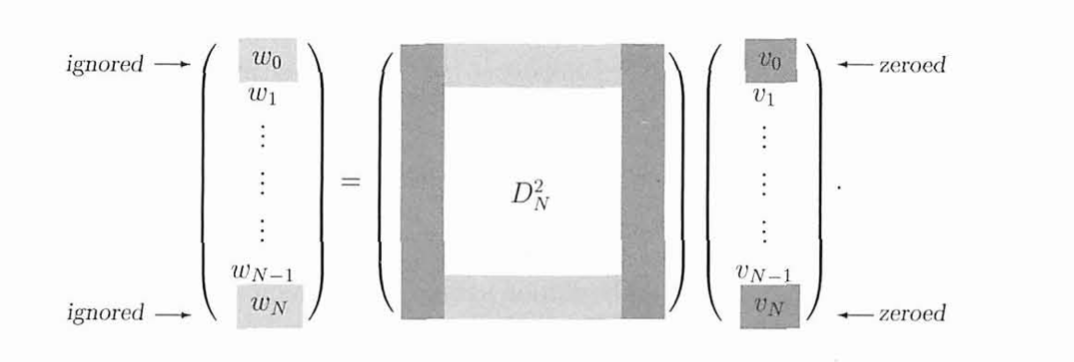

In [1]:
from IPython.display import Image
Image(filename='DN_cheby2.png') 

In other words, to solve our one-dimensional Poisson problem by a Chebyshev spectral method, we can make use of the $( N - 1 ) \times ( N - 1 )$ matrix $\tilde{D}_N^{(2)}$ obtained by stripping $D_N^{(2)}$ of its first and last rows and columns. In Python notation:
$$\tilde{D}^{(2)}_N = D2[1:N,1:N]$$

The numerical solution becomes a matter of solving a linear system of equations:
$$ \tilde{D}^{(2)}_N v = f.$$



What if the equation is nonlinear? For example, suppose we change the equation to
$$ u_{xx} = e^{u}, \quad -1<x<1, \quad u(\pm 1)=0.$$

We can solve the problem iteratively by chooseing an initial guess, such as the vector of zeros, then iterate by repeatedly solving the system of equations
$$ \tilde{D}_N^2 v_{\rm new} = \exp(v_{\rm old}),$$

# Program 13: Solve linear BVP $u_{xx} = \exp(4x)$, $u(-1)=u(1)=0$

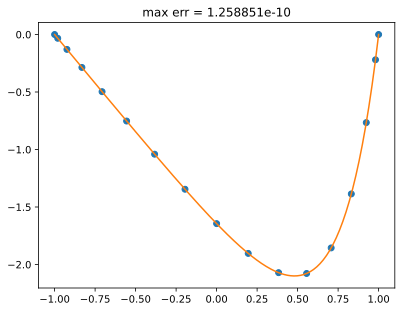

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import *
from numpy import dot,exp,zeros,sinh,cosh,max,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from scipy.linalg import solve
from matplotlib.pyplot import title,plot

N = 16
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]
f = exp(4.0*x[1:N])
u = solve(D2,f)
s = zeros(N+1)
s[1:N] = u

xx = linspace(-1.0,1.0,200)
uu = polyval(polyfit(x,s,N),xx)    # interpolate grid data
uexact = (exp(4.0*xx) - sinh(4.0)*xx - cosh(4.0))/16.0
maxerr = norm(uu-uexact,inf)

title('max err = %e' % maxerr)
plot(x,s,'o',xx,uexact);

# Program 14 - Solve nonlinear BVP $u_{xx} = \exp(u)$, $u(-1)=u(1)=0$ by iteration

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import dot,exp,zeros,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from chebPy import cheb
from scipy.linalg import solve
from matplotlib.pyplot import title,plot

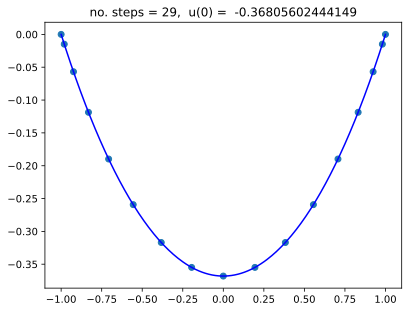

In [4]:
N = 16 # N must be even
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]

u = zeros(N-1)
err = zeros(N-1)
change, it = 1.0, 0

while change > 1.0e-15:
    unew = solve(D2,exp(u))
    change = norm(unew-u, inf)
    u = unew
    it += 1

# Add bounday values to u vector
s = zeros(N+1); s[1:N] = u; u = s;

xx = linspace(-1.0,1.0,201)
uu = polyval(polyfit(x,u,N),xx)    # interpolate grid data

title('no. steps = %d,  u(0) = %18.14f' %(it,u[N//2]) )
plot(x,u,'o',xx,uu,'b');

As a third application of the modified second-order differentiation matrix $\tilde{D}^2_N$, consider the eigenvalue boundary value problem
$$ u_{xx} = \lambda u, \quad -1<x<1, \quad u(\pm 1)=0.$$

# Program 15 - Solve eigenvalue BVP $u_{xx} = \lambda u$, $u(-1)=u(1)=0$

eigenvalue, $\lambda_n = -n^2\pi^2/4$

eigenfunction, $u_n = \sin(n\pi(x+1)/2)$

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import dot,argsort,linspace,shape,zeros,polyval,polyfit,pi,real
from chebPy import cheb
from scipy.linalg import solve,eig
from matplotlib.pyplot import figure,subplot,plot,title,axis

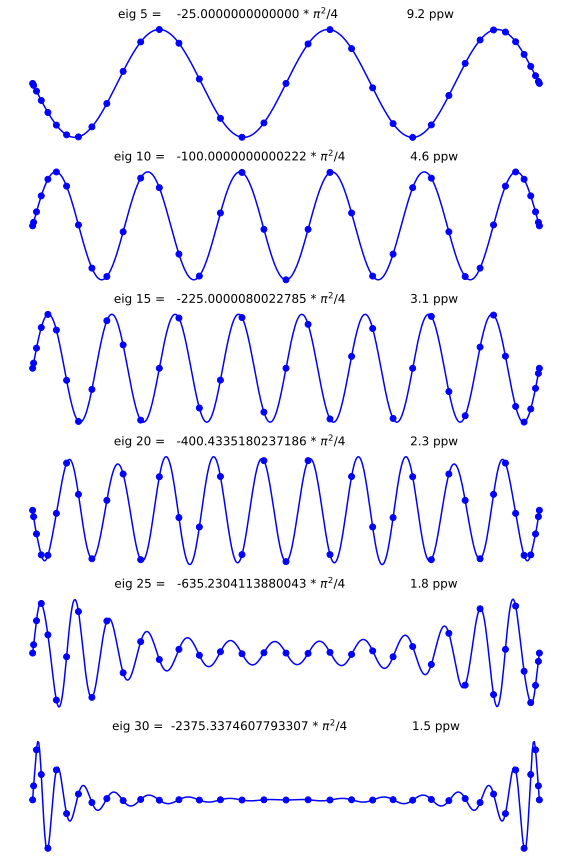

In [21]:
N = 36
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]

lam,V = eig(D2)   
ii = argsort(-lam)
lam = real(lam[ii])
V = V[:,ii]

fig = figure(figsize=(10,15))
for j in range(5,35,5):              
    lv = shape(V)[0]+2
    u = zeros(lv)
    u[1:lv-1] = V[:,int(j)]  
    subplot(6,1,j//5)
    plot(x,u,'bo')
    xx = linspace(-1.0,1.0,501)
    uu = polyval(polyfit(x,u,N),xx)    # interpolate grid data
    s = 'eig %d = %20.13f * $\pi^2$/4' %(j,lam[j-1]*4/pi**2)
    s = s + '\t\t %4.1f ppw' % (4*N/(pi*j))
    title(s)
    plot(xx,uu,'b')
    axis('off')

**ppw**: grid points per wavelength

**Exercise 15** Solve the boundary value problem $$u_{xx} +4u_x +e^xu = \sin(8x)$$ 
numerically on $[-1, 1]$ with boundary conditions $u ( \pm 1) = 0$. To 10 digits of accuracy, what is $u(0)$?


**Exercise 16** In the iteration of Program 14, each step is observed to reduce the error norm by a factor of about $0.2943$. This explains why 30 steps are enough to reduce the error to $10^{-14}$. Add one or two lines to the code to compute the eigenvalues of an appropriate matrix to show where the number $0.2943$ comes from.

# FFT Implementation of Chebyshev Spectral Method

We will see how Chebyshev spectral methods can be implemented by the FFT which provides a crucial speedup for some calculations. Equally important will be the mathematical idea that underlies this technique the equivalence of
- Chebyshev series,  in $x\in [-1,1]$, 
- Fourier series,  in $\theta \in \mathbb{R}/(2\pi)$,
- Laurent series,  in $z$ on the unit circle. 
Let $z$ be a complex number on the unit circle: $|z|=1$. Let $\theta$ be the argument of $z$, a real number that is determined up to multiples of $2\pi$. 
Let $x=\mathrm{Re}z = \cos\theta$. For each $x\in[-1,1]$, there are two complex conjugate values of $z$, and we have 
$$x=\mathrm{Re}z = \frac12 (z+z^{-1})=\cos\theta \in [-1,1].$$
The $n$th Chebyshev polynomial, denoted $T_n$, is defined by 
$$T_n(x)=\mathrm{Re}z^n = \frac12(z^n+z^{-n})=\cos n\theta.$$

$$T_0(x) = 1,$$
$$T_1(x) = x,$$
$$T_2(x) = 2x^2-1,$$
$$T_3(x) = 4x^3-3x.$$

In general, 
$$T_{n+1}(x) = \frac12(z^{n+1}+z^{-n-1}) = \frac12(z^{n}+z^{-n})(z+z^{-1}) - \frac12(z^{n-1}+z^{1-n}),$$
which amounts to the recurrence relation
$$T_{n+1}(x) = 2xT_n(x)-T_{n-1}(x).$$

Since $T_n$ is of exact degree n for each n, any degree N polynomial can be written uniquely as a linear combination of Chebyshev polynomials,
$$p(x) = \sum_{n=0}^N a_n T_n(x), \quad x\in[-1,1].$$
with the relation 
$$T_n(x)=\mathrm{Re}z^n = \frac12(z^n+z^{-n})=\cos n\theta.$$
we have 
$$\mathsf{p}(z) = \sum_{n=0}^N a_n (z^n+z^{-n}), \quad |z|=1.$$
and a degree N $2\pi$-periodic trigonometric polynomial that is even, that is, such that $P(\theta)=P(-\theta)$:
$$P(\theta) = \sum_{n=0}^N a_n \cos n\theta, \quad\theta\in\mathbb{R}.$$
The functions $p$, $\mathsf{p}$, and $P$ are equivalent in the sense that $p(x)=\mathsf{p}(z)=P(\theta)$ when $$x=\mathrm{Re}z = \frac12 (z+z^{-1})=\cos\theta \in [-1,1].$$


Similarly, from an arbitrary function $f (x)$ defined for $x \in [- 1,1]$, we can form a self-reciprocal function $\mathsf{f}(z)$ defined on the unit circle and a periodic function $F(\theta)$ defined on $\mathbb{R}$:
$$\mathsf{f}(z)=f\Big(\frac{z+z^{-1}}{2}\Big), \quad F(\theta) = f(\cos\theta).$$

For spectral collocation methods, we mainly deal with $p$, $\mathsf{p}$, and $P$  as interpolants of function $f$, $\mathsf{f}$, and $F$. The interpolation points are as follows:
$$
\begin{aligned}
    &\theta_j = j\pi/N,\\
    &z_j = e^{i\theta_j}, \\
    &x_j = \cos\theta_j = \mathrm{Re}z_j,
\end{aligned}
$$
with $0\leq j \leq N$. We have the equivalences:

- $P(\theta)$ interpolates $F(\theta)$ (even and $2\pi$-periodic) in the equispaced points $\{\theta_j\}$;
- $\mathsf{p}(z)$ interpolates $\mathsf{f}(z)$ (self-reciprocal) in the roots of unity $\{z_j\}$;
- $p(x)$ interpolates $f (x)$ (arbitrary) in the Chebyshev points $\{x_j\}$.

We are now prepared to describe an FFT algorithm for Chebyshev spectral differentiation. The key point is that the polynomial interpolant $q$ of $f$ can be differentiated by finding a trigonometric polynomial interpolant $Q$ of $F$, differentiating in Fourier space, and transforming back to the $x$ variable. Once we are working on a periodic equispaced grid, we can take advantage of the FFT.

# Chebyshev spectral differentiation via FFT

## Algorithm

- Given data $v_0$,...,$v_N$ at Chebyshev points $x_0 = 1$,...,$x_N = -1$, extend this data to a vector $V$ of length $2N$ with $V_{2N-j} = v_j$, $j =1,2,...,N-1$. 
- Using the FFT, calculate 
$$\hat{V}_k = \frac{\pi}{N}\sum_{j=1}^{2N} e^{-ik\theta_j} V_j, \quad k=-N+1, ..., N.$$
- Define $\hat{W}_k=ik\hat{V}_k$, except $\hat{W}_N =0$.
- Compute the derivative of the trigonometric interpolant Q on the equispaced grid by the inverse FFT:
$$ W_j = \frac{1}{2\pi}\sum_{k=-N+1}^{N} e^{ik\theta_j}\hat{W}_k, \quad j = 1, ..., 2N. $$
- Calculate the derivative of the algebraic polynomial interpolant $q$ on the interior grid points by 
$$w_j = -\frac{W_j}{\sqrt{1-x_j^2}}, \quad j= 1, ..., N-1,$$
&emsp;&emsp; with the special formulas at the endpoints
$$w_0 = \frac{1}{2\pi}\sum_{n=0}^N{}^{'}n^2\hat{v}_n, \quad w_N = \frac{1}{2\pi}\sum_{n=0}^N{}^{'}(-1)^{n+1}n^2\hat{v}_n, $$
&emsp;&emsp;where the prime $'$ indicates that the terms $n = 0,N$ are multiplied by $\frac12$.

## Explanation
The algorithm can be explained as follows. The trigonometric interpolant of the extended $\{v_j\}$ data is given by evaluating the inverse FFT at arbitrary $\theta$. Using the $a_n$ coefficients we find that
$$P(\theta) = \frac{1}{2\pi}\sum_{k=-N+1}^N e^{ik\theta}\hat{V}_k = \sum_{n=0}^N a_n \cos n\theta.$$

The algebraic polynomial interpolant of the $\{v_j\}$ data is $p(x) = P(\theta)$, where $x = \cos\theta$, and the derivative is
$$ p'(x) = \frac{P'(\theta)}{dx/d\theta} = \frac{-\sum_{n=0}^N na_n \sin n\theta}{-\sin\theta} = 
\frac{\sum_{n=0}^N na_n \sin n\theta}{\sqrt{1-x^2}}.$$

As for the special formulas for $w_0$ and $w_N$, we determine the value of $p'(x)$ at $x=\pm 1$ by l'Hopital's rule, which gives 
$$ p'(1)=\sum_{n=0}^N n^2a_n, \quad p'(-1) = \sum_{n=0}^N (-1)^{n+1}n^2 a_n.$$

In [22]:
from numpy import pi,cos,arange,array, flipud,\
     real,zeros, sqrt
from numpy.fft import fft,ifft

def chebfft(v):
    '''Chebyshev differentiation via fft.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    N = len(v)-1
    if N == 0:
        w = 0.0 # only when N is even!
        return w
    x  = cos(pi*arange(0,N+1)/N)
    ii = arange(0,N)
    V = flipud(v[1:N]); V = list(v) + list(V);
    U = real(fft(V))
    b = list(ii); b.append(0); b = b + list(arange(1-N,0));
    w_hat = 1j*array(b)
    w_hat = w_hat * U
    W = real(ifft(w_hat))
    w = zeros(N+1)
    w[1:N] = -W[1:N]/sqrt(1-x[1:N]**2)
    w[0] = sum(ii**2*U[ii])/N + 0.5*N*U[N]
    w[N] = sum((-1)**(ii+1)*ii**2*U[ii])/N + \
              0.5*(-1)**(N+1)*N*U[N]
    return w

# Program 18: Chebyshev differentiation via FFT

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from chebfftPy import chebfft
from numpy import pi,linspace,sin,cos,exp,round,zeros,arange,real, flipud
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure,subplot,plot,grid,title,axis

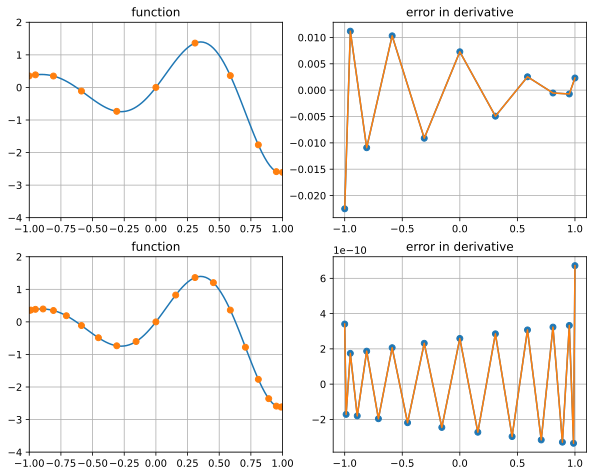

In [9]:
figure(figsize=(10,12))
plot_count = 1

for N in [10,20]:
    xx = linspace(-1.0,1.0,100)
    ff = exp(xx)*sin(5*xx)
    x = cos(arange(0,N+1)*pi/N)
    f = exp(x)*sin(5*x)
    error = chebfft(f) - exp(x)*(sin(5*x)+5*cos(5*x))
    subplot(3,2,plot_count)
    plot_count +=1
    plot(xx,ff,'-',x,f,'o')
    grid(True)
    axis([-1, 1, -4,2])
    title('function')
    subplot(3,2,plot_count)
    plot_count +=1
    plot(x,error,'-o')
    title('error in derivative')
    plot(x,error) 
    grid(True)

To see the method at work for a PDE, consider the wave equation
$$u_{tt} = u_{xx}, \quad -1<x<1, \; t>0, \; u(\pm 1 )=0.$$
To solve this equation numerically we use a leap frog formula in $t$ and Chebyshev spectral differentiation in $x$. To complete the formulation of the numerical method we need to specify two initial conditions. For the PDE, these would typically be conditions on $u$ and $u_t$. For the finite difference scheme, we need conditions on u at $t = 0$ and at $t = -\Delta t$, the previous time step. Our choice at $t = -\Delta t$ is initial data corresponding to a left-moving Gaussian pulse. Program 19 implements this and should be compared with Program 6. This program, however, runs rather slowly because of the short time step $\Delta t =0.0013$ needed for numerical stability. Time step restrictions are discussed in further studies (Chapter 10).

# Program 19: Second order Wave Equation on Chebyshev Grid 

We solve
$$
u_{tt} = u_{xx}, \qquad -1 < x < 1,   \qquad t > 0
$$
with boundary condition
$$
u(\pm 1,t) = 0
$$
and initial condition
$$
u(x,0) = e^{-200 x^2}
$$

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from chebfftPy import chebfft
from numpy import arange,cos,zeros,round,exp,pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.pyplot import figure

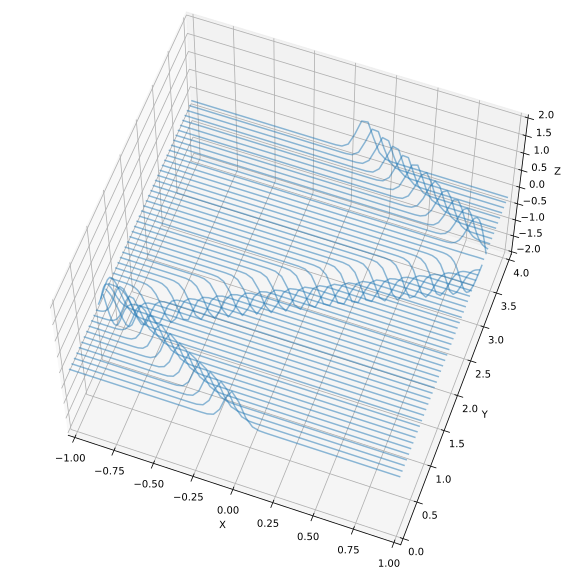

In [11]:
# Time-stepping by Leap Frog Formula:
N = 80; t = 0.0 ;x = cos(pi*arange(0,N+1)/N);dt = 8.0/(N**2);
v = exp(-200*x**2); vold = exp(-200*(x-dt)**2);
tmax = 4 ; tplot = 0.075;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot));
plotdata = []; plotdata.append(list(zip(x,v)));
tdata = []; tdata.append(0.0)
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        w = chebfft(chebfft(v)); w[0] = 0.0; w[N] = 0.0; 
        vnew = 2*v - vold + dt**2*w; vold = v; v = vnew;
    plotdata.append(list(zip(x,v)));
    tdata.append(t);

fig = figure(figsize=(10,12))
ax = fig.add_subplot(111,projection='3d')
poly = LineCollection(plotdata)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(-1, 1)
ax.set_ylabel('Y')
ax.set_ylim3d(0, tmax)
ax.set_zlabel('Z')
ax.set_zlim3d(-2, 2)
ax.view_init(60,-70)

As a second example we consider the wave equation in two space dimensions:
$$u_{tt}=u_{xx}+u_{yy}, \quad -1 <x,y<1, \quad t>0, \quad u=0 \mathrm {on the boundary},$$ 
with initial data
$$ u(x,y,0) = e^{-40((x-0.4)^2+y^2)}, \quad u_t(x,y,0)=0.$$

## Program 20 Second order wave equation in 2-D via FFT

We solve the wave equation in 2-d
$$
u_{tt} = u_{xx}+u_{yy}, \qquad -1 < x,y < 1, \qquad t >0
$$
with $u = 0$ on the boundary and initial condition
$$
u(x,y,0) = e^{-40((x-0.4)^2 + y^2)}, \qquad u_{t}(x,y,0) = 0
$$

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from numpy import meshgrid,cos,pi,round,exp,real,remainder,zeros,flip,fliplr,flipud,array,arange
from numpy.fft import fft, ifft
from matplotlib.pyplot import subplot, figure ,title,axis
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel
from matplotlib import cm
from scipy.interpolate import interp2d,RectBivariateSpline

In [13]:
N = 24; x = cos(pi*arange(0,N+1)/N); 
flip(x)


array([-1.00000000e+00, -9.91444861e-01, -9.65925826e-01, -9.23879533e-01,
       -8.66025404e-01, -7.93353340e-01, -7.07106781e-01, -6.08761429e-01,
       -5.00000000e-01, -3.82683432e-01, -2.58819045e-01, -1.30526192e-01,
        6.12323400e-17,  1.30526192e-01,  2.58819045e-01,  3.82683432e-01,
        5.00000000e-01,  6.08761429e-01,  7.07106781e-01,  7.93353340e-01,
        8.66025404e-01,  9.23879533e-01,  9.65925826e-01,  9.91444861e-01,
        1.00000000e+00])

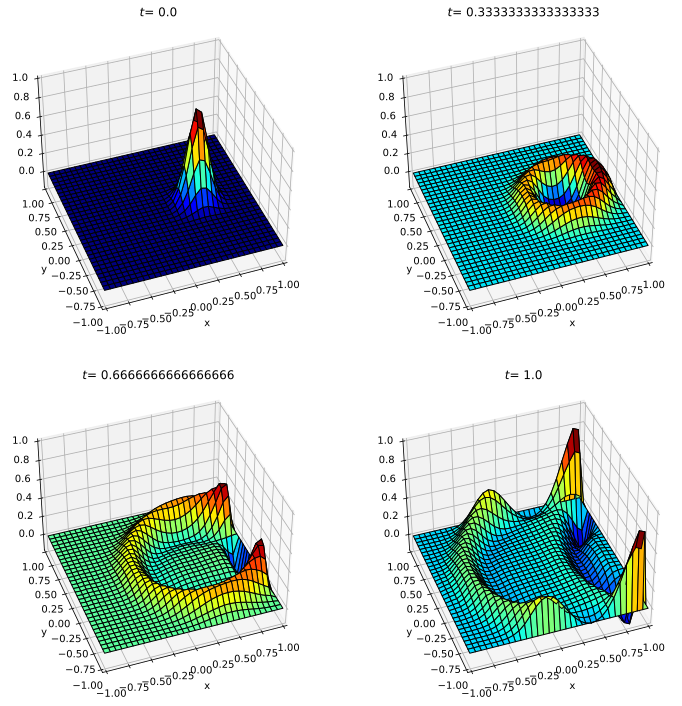

In [14]:
# Grid and inital Data:
N = 24; x = cos(pi*arange(0,N+1)/N); x = flip(x); y = x;
t = 0.0; dt = (6.0)/(N**2)
xx, yy = meshgrid(x,y)
plotgap = int (round( (1.0/3.0) / (dt))); dt = (1.0/3.0)/(plotgap);            
vv = exp(-40*((xx-0.4)**2 + yy**2));
vvold = vv; 

#Time stepping Leapfrog Formula:
fig = figure(figsize=(12,12))
k = 1;
for n in range(0,(3*plotgap)+1):
    t = n*dt;
    if (remainder(n+0.5,plotgap) < 1):
        ax = fig.add_subplot(2,2,k,projection ='3d')
        # f = interp2d(x,y,vv,kind='cubic');
        f = RectBivariateSpline(x,y,vv);
        xxx = arange(-1.,1.+1./16,1./16);
        vvv = f(xxx,xxx)
        X,Y = meshgrid(xxx,xxx);
        ax.plot_surface(X,Y,vvv,rstride=1,cstride=1,cmap=cm.jet,edgecolor='black')
        ax.set_zlim3d([-0.15,1])
        ax.set_xlim3d([-1,1])
        ax.set_ylim3d([-1,1])
        ax.view_init(elev=40., azim=250.)
        title("$ t $= " +str(t))
        xlabel("x"); ylabel("y");
        k = k+1;
    
    uxx = zeros((N+1,N+1)); uyy = zeros((N+1,N+1));
    ii = arange(1,N);
    
    for i in range(1,N):
        v = vv[i,:];          
        V = list(v) + list(flipud(v[ii]));
        U = real(fft(V));
        w1_hat = 1j*zeros(2*N);
        w1_hat[0:N] = 1j*arange(0,N)
        w1_hat[N+1:] = 1j*arange(-N+1,0)
        W1 = real(ifft(w1_hat * U))
        w2_hat = 1j*zeros(2*N);
        w2_hat[0:N+1] = arange(0,N+1)
        w2_hat[N+1:] = arange(-N+1,0)
        W2 = real(ifft((-w2_hat**2) * U))
        uxx[i,ii] = W2[ii]/(1-x[ii]**2) - (x[ii]*W1[ii])/(1-x[ii]**2)**(3.0/2);
    for j in range(1,N):
        v = vv[:,j]; 
        V = list(v) + list(flipud(v[ii]));
        U = real(fft(V))
        w1_hat = 1j*zeros(2*N);
        w1_hat[0:N] = 1j*arange(0,N)
        w1_hat[N+1:] = 1j*arange(-N+1,0)
        W1 = real(ifft(w1_hat * U))
        w2_hat = 1j*zeros(2*N);
        w2_hat[0:N+1] = arange(0,N+1)
        w2_hat[N+1:] = arange(-N+1,0)
        W2 = real(ifft(-(w2_hat**2) * U))
        uyy[ii,j] = W2[ii]/(1-y[ii]**2) - y[ii]*W1[ii]/(1-y[ii]**2)**(3.0/2.0);
    vvnew = 2*vv - vvold + dt**2 *(uxx+uyy)
    vvold = vv ; vv = vvnew;

## Program 16: Poisson equation on [-1,1]x[-1,1] with u=0 on boundary

We solve the following Poisson problem
$$
u_{xx} + u_{yy} = 10\sin(8x(y-1)), \qquad -1 < x,y < 1, \qquad u=0 \quad \text{on boundary}
$$

In [15]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import cheb
from numpy import meshgrid,sin,dot,eye,kron,zeros,reshape,linspace,flip
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel,spy
from matplotlib import cm
from scipy.linalg import solve
from scipy.interpolate import interp2d,RectBivariateSpline

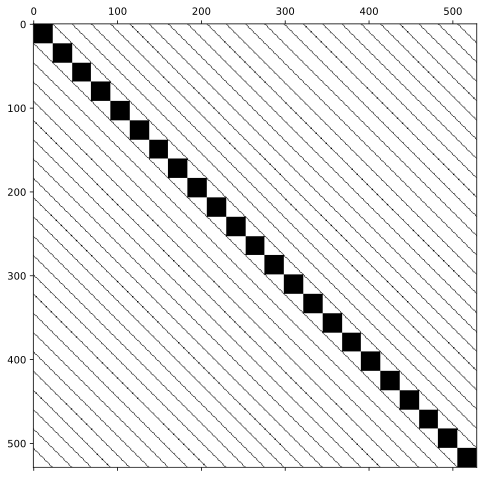

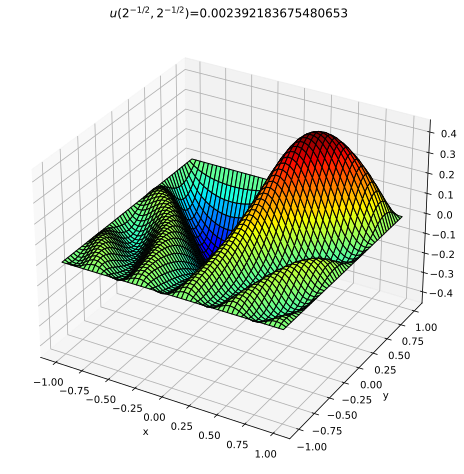

In [16]:
N = 24; D,x = cheb(N); x = flip(x); y = x;
xx,yy = meshgrid(x[1:N],y[1:N])
xx = reshape(xx,(N-1)**2)
yy = reshape(yy,(N-1)**2)
f = 10*sin(8*xx*(yy-1))
D2 = dot(D,D); D2 = D2[1:N,1:N]; I = eye(N-1)
L = kron(I,D2) + kron(D2,I)
# Plot sparsity pattern
figure(figsize=(8,8)), spy(L)
# Solve Lu=f
u = solve(L,f)
# Convert 1-d vectors to 2-d
uu = zeros((N+1,N+1)); uu[1:N,1:N] = reshape(u,(N-1,N-1))
[xx,yy] = meshgrid(x,y)
value = uu[N//4,N//4]

# Interpolate to finer mesh just for visualization
# f = interp2d(x,y,uu,kind='cubic')
f = RectBivariateSpline(x, y, uu)
xxx = linspace(-1.0,1.0,50)
uuu = f(xxx,xxx)
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
X,Y = meshgrid(xxx,xxx)
ax.plot_surface(X,Y,uuu,rstride=1,cstride=1,cmap=cm.jet,edgecolor='black')
title("$u(2^{-1/2},2^{-1/2})$="+str(value))
xlabel("x"); ylabel("y");

# Program 17: Helmholtz Equation 

$$ 
u_{xx} + u_{yy} + k^{2}u = f, \qquad \text{on} \qquad [-1,1] \times [-1,1]
$$
A minor modification of p16 to solve such problem for the particular choices as follows:

$$
k = 9, \qquad f(x,y) = \exp (-10[(y-1)^2 +(x-1/2)^2])
$$

In [17]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import cheb
from numpy import meshgrid,sin,dot,eye,kron,zeros,reshape,exp,linspace,flip
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel,contour
from matplotlib import cm
from scipy.linalg import solve
from scipy.interpolate import interp2d,RectBivariateSpline

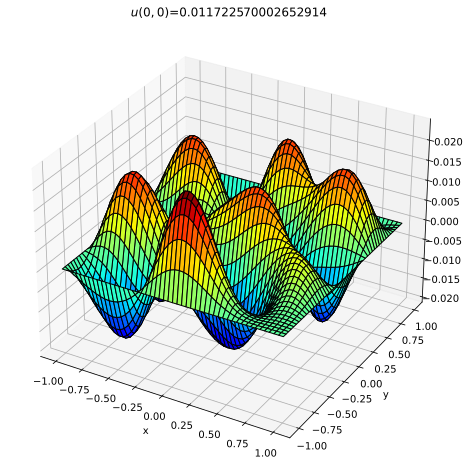

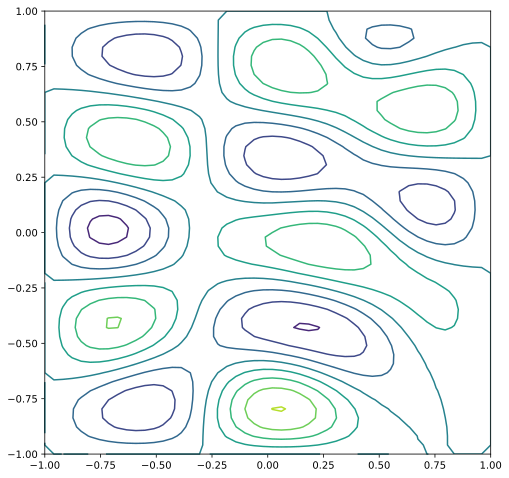

In [18]:
N = 24; D,x = cheb(N); x=flip(x); y = x;
xx,yy = meshgrid(x[1:N],y[1:N])
xx = reshape(xx,(N-1)**2)
yy = reshape(yy,(N-1)**2)
f = exp(-10*((yy-1)**2 + (xx - 0.5)**2 ))
D2 = dot(D,D); D2 = D2[1:N,1:N]; I = eye(N-1)
k = 9
L = kron(I,D2) + kron(D2,I) + k**2*eye((N-1)**2)
# Solve Lu=f
u = solve(L,f)
# Convert 1-d vectors to 2-d
uu = zeros((N+1,N+1)); uu[1:N,1:N] = reshape(u,(N-1,N-1))
[xx,yy] = meshgrid(x,y)
value = uu[N//2,N//2]

# f = interp2d(x,y,uu,kind='cubic')
f = RectBivariateSpline(x,y,uu)
xxx = linspace(-1.0,1.0,50)
uuu = f(xxx,xxx)

fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
[X ,Y] = meshgrid(xxx,xxx)
ax.plot_surface(X,Y,uuu,rstride=1,cstride=1,cmap=cm.jet,edgecolor='black')
title("$u(0,0)$="+str(value))
xlabel("x"); ylabel("y");

figure(figsize = (8,8))
contour(X,Y,uuu);

# Further development of Spectral Methods
#### Spectral methods can be implemented on higher dimensions;
#### Spectral methods can be used to solve complicated PDEs such as Navier-Stokes and kinetic equations;
#### Spectral methods can be used to solve higher order PDEs, such as biharmonic or phase field equations;
#### Spectral methods can treat problems on unbounded domains using Hermite or Laguerre functions;
#### Spectral methods can combine with local methods such as Finite Element Methods -- Spectral element methods, to combine the geometric flexibility of finite elements with the high accuracy of spectral methods. 

**Spectral Element Method (Maday, Karnidakis, Patera, ...)**
<img src="https://image1.slideserve.com/2986488/slide7-l.jpg" width=400 height=320/>

**Fourier Continuation Method (Bruno, )**
<img src="https://www.researchgate.net/publication/265291741/figure/fig1/AS:614142394253352@1523434365968/Setup-of-the-Fourier-Continuation-method-of-a-non-periodical-function-f-x-red-line-in.png" width=400 height=320/>

**Applications of Spectral Method**
<div style="display:flex">
     <div style="flex:1;padding-right:10px;">
        <img src="https://tse3-mm.cn.bing.net/th/id/OIP-C.8BirX-Q7DsH3CRmmNE22CwHaMM?pid=ImgDet&rs=1
" width=200 height=400/>
     </div>
     <div style="flex:1;padding-right:10px;">
        <img src="https://ts1.cn.mm.bing.net/th/id/R-C.9a05e733ca11d23f8f3933badcc25657?rik=i2q4dSThrf9ALQ&pid=ImgRaw&r=0" width=200 height=400/>
     </div>
     <div style="flex:1;padding-left:10px;">
        <img src="https://tse3-mm.cn.bing.net/th/id/OIP-C.45g-QkDE1-_Wl4TqKkRK_wAAAA?pid=ImgDet&rs=1" width=200 height=400/>
     </div>
     <div style="flex:1;padding-left:10px;">
        <img src="https://tse1-mm.cn.bing.net/th/id/OIP-C.wInyzCY66B0NW9N5whd1wwHaLI?pid=ImgDet&rs=1" width=200 height=400/>
     </div>
     <div style="flex:1;padding-left:10px;">
        <img src="https://global.oup.com/academic/covers/pop-up/9780198528692" width=200 height=400/>
     </div>
</div>


## Code

- Chebfun http://www.chebfun.org
Chebfun is an open-source package for computing with functions to about 15-digit accuracy.

- Dedalus https://github.com/DedalusProject/dedalus 
Dedalus is a flexible framework for solving partial differential equations using modern spectral methods. 

- Nektar https://www.nektar.info
Nektar++ is a cross-platform spectral/ element framework which aims to make high-order finite element methods accessible to the broader community.

- SPECFEM https://github.com/SPECFEM
SPECFEM hosts a family of spectral-element code repositories

- SPSMAT https://github.com/Sleron/SPSMAT
SPSMAT is an Octave/Matlab package to apply Spectral and Pseudospectral methods for solving ODEs and PDEs.
